## TF Graphs

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(1)
tf.set_random_seed(1)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[89.46066635,  8.50442114,  3.90547832, 16.98304196, 87.81425034],
       [ 9.83468338, 42.1107625 , 95.78895302, 53.3165285 , 69.1877114 ],
       [31.5515631 , 68.65009277, 83.46256719,  1.82882773, 75.01443149],
       [98.88610889, 74.81656544, 28.04439921, 78.92793285, 10.32260066],
       [44.78935262, 90.85955031, 29.36141484, 28.77753386, 13.00285721]])

In [5]:
rand_b = np.random.uniform(0,100,(5,1))

In [6]:
rand_b

array([[ 1.93669579],
       [67.88355329],
       [21.1628116 ],
       [26.55466594],
       [49.15731593]])

In [7]:
a = tf.placeholder(tf.float32)

In [8]:
b = tf.placeholder(tf.float32)

In [11]:
add_op = a + b

In [12]:
mul_op = a * b

In [18]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print("----------------")
    mult_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[ 91.39736   10.441117   5.842174  18.919737  89.750946]
 [ 77.71824  109.994316 163.67252  121.20008  137.07126 ]
 [ 52.714375  89.812904 104.62538   22.991638  96.177246]
 [125.44077  101.37123   54.599068 105.4826    36.877266]
 [ 93.94667  140.01686   78.51873   77.934845  62.16017 ]]
----------------
[[ 173.25809     16.470476     7.5637236   32.890987   170.06949  ]
 [ 667.6132    2858.6282    6502.4946    3619.3154    4696.708    ]
 [ 667.7198    1452.829     1766.3026      38.703136  1587.5164   ]
 [2625.8877    1986.729      744.70966   2095.905      274.11322  ]
 [2201.7244    4466.4116    1443.3282    1414.6263     639.18555  ]]


### Example Neural Network

In [19]:
n_features = 10
n_dense_neurons = 3

In [20]:
x = tf.placeholder(tf.float32,shape=(None,n_features))

In [23]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [24]:
xW = tf.matmul(x,W)

In [25]:
z = tf.add(xW,b)

In [26]:
a = tf.sigmoid(z)

In [27]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [29]:
print(layer_out)

[[0.58780503 0.94550604 0.92066914]]


### Simple Regression Example

In [30]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [31]:
x_data

array([0.10768922, 1.60249505, 2.26688956, 4.6671176 , 4.70410957,
       6.7657613 , 5.57909078, 6.69560682, 9.81106276, 9.69303051])

In [32]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [33]:
y_label

array([-1.00393741,  2.39363685,  1.7655198 ,  4.08576964,  5.1224384 ,
        6.70547383,  7.03768329,  8.53060508,  8.43558391,  9.30978368])

In [34]:
import matplotlib.pyplot as plt

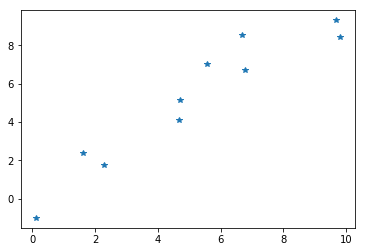

In [35]:
plt.plot(x_data,y_label,"*")

In [37]:
#y = mx + b
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))

In [38]:
print(m,b)

<tf.Variable 'Variable_4:0' shape=(1,) dtype=float64_ref> <tf.Variable 'Variable_5:0' shape=(1,) dtype=float64_ref>


In [40]:
error = 0

for x,y in zip(x_data , y_label):
    
    y_hat = m*x + b
    error+= (y - y_hat)**2

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [42]:
init = tf.global_variables_initializer()

In [49]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 1000
    
    for i in range(training_steps):
        sess.run(train)
    
    final_slope , final_intercept = sess.run([m,b])

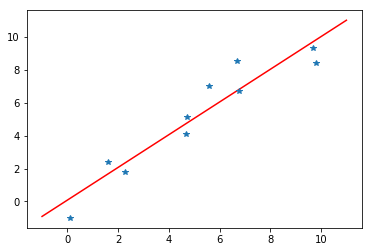

In [50]:
x_test = np.linspace(-1,11,10)

y_pred = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_label,"*")